In [1]:
!pip install openpyxl

In [2]:
!pip install xlwt

In [3]:
import numpy
print('numpy',numpy.__version__)
import random
import time
import xlwt
import pandas
import pytz
import datetime
print('pandas',pandas.__version__)
import matplotlib.pyplot as plt
import openpyxl

numpy 1.13.3
pandas 0.23.4


# straight line

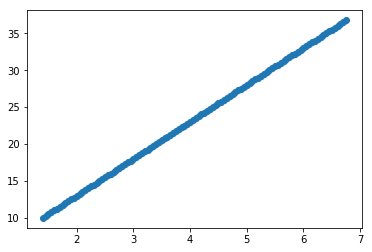

In [4]:
x = numpy.arange(start=1.4, stop=6.8, step=0.05)
y = 5*x+3
_=plt.scatter(x, y)

In [5]:
df_linear = pandas.DataFrame({'x':x,'y':y})
print(df_linear.shape)
df_linear.head()

(108, 2)


,x,y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00


In [6]:
# https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

for remov in range(int(len(x)*0.1)):
    row_to_remove_from = random.choice(df_linear.index.values)
#    print(row_to_remove_from)
    df_linear.at[row_to_remove_from,'x']=numpy.nan

In [7]:
df_linear.to_excel('imputation_homework_29.xlsx')

# Gaussian distribution

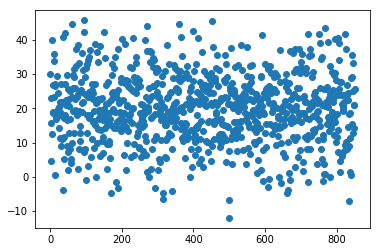

In [8]:
num_points=852

vshift=20
y=numpy.random.normal(0,10,num_points)+vshift
_=plt.scatter(range(len(y)),y)

In [9]:
df=pandas.DataFrame(data=y)
df.head()

,0
0,30.001248
1,4.655104
2,15.621201
3,22.982759
4,39.994644


In [10]:
date_today = datetime.datetime.now().astimezone(pytz.timezone('US/Eastern'))
date_today

datetime.datetime(2019, 3, 25, 21, 52, 6, 507831, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)

In [11]:
pandas.date_range(date_today, date_today + datetime.timedelta(7), freq='D')

DatetimeIndex(['2019-03-25 21:52:06.507831-04:00',
               '2019-03-26 21:52:06.507831-04:00',
               '2019-03-27 21:52:06.507831-04:00',
               '2019-03-28 21:52:06.507831-04:00',
               '2019-03-29 21:52:06.507831-04:00',
               '2019-03-30 21:52:06.507831-04:00',
               '2019-03-31 21:52:06.507831-04:00',
               '2019-04-01 21:52:06.507831-04:00'],
              dtype='datetime64[ns, US/Eastern]', freq='D')

In [12]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
days = pandas.Series(pandas.date_range('2015-11-03', freq='D', periods=len(y)))
days.head()

0   2015-11-03
1   2015-11-04
2   2015-11-05
3   2015-11-06
4   2015-11-07
dtype: datetime64[ns]

In [13]:
df = pandas.concat([pandas.DataFrame(days),pandas.DataFrame(y)], axis=1)
df.columns=['date','value']

df.head()

,date,value
0,2015-11-03,30.001248
1,2015-11-04,4.655104
2,2015-11-05,15.621201
3,2015-11-06,22.982759
4,2015-11-07,39.994644


In [14]:
for remov in range(int(df.shape[0]*0.1)):
    row_to_remove_from = random.choice(df.index.values)
#    print(row_to_remove_from)
    df.at[row_to_remove_from,'value']=numpy.nan

In [15]:
df.to_excel('imputation_homework_91.xlsx')

# sine wave

In [16]:
f_s = 50.0 # Hz
f = 1.0 # Hz
time = numpy.arange(0.0, 10.0, 1/f_s)
x = 5 * numpy.sin(2 * numpy.pi * f * time) + 2 * numpy.sin(10 * 2 * numpy.pi * f * time)

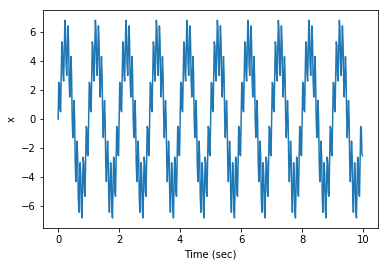

In [17]:
plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x");

In [18]:
df = pandas.concat([pandas.DataFrame(time),pandas.DataFrame(x)], axis=1)
df.columns=['time','value']


In [19]:
# https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
#df = df.sample(frac=1).reset_index(drop=True)

In [20]:
df.head()

,time,value
0,0.00,0.000000
1,0.02,2.528779
2,0.04,2.419020
3,0.06,0.665052
4,0.08,0.506655


In [21]:
for remov in range(int(df.shape[0]*0.1)):
    row_to_remove_from = random.choice(df.index.values)
#    print(row_to_remove_from)
    df.at[row_to_remove_from,'value']=numpy.nan

In [22]:
df.isna().sum()

time      0
value    50
dtype: int64

In [23]:
df.to_excel('imputation_homework_04.xls')